In [1]:
import pandas as pd

C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("MetroPT3(AirCompressor).csv")

In [3]:
data.head(4)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [5]:
# Convert the 'timestamp' column to a datetime format for easier filtering
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [6]:
# Define the failure information
failure_info = [
    {'Start Time': '2020-04-18 00:00:00', 'End Time': '2020-04-18 23:59:00', 'Failure': 'Air Leak', 'Severity': 'High stress', 'Maintenance_Report': None},
    {'Start Time': '2020-05-29 23:30:00', 'End Time': '2020-05-30 06:00:00', 'Failure': 'Air Leak', 'Severity': 'High stress', 'Maintenance_Report': 'Maintenance on 30Apr at 12:00'},
    {'Start Time': '2020-06-05 10:00:00', 'End Time': '2020-06-07 14:30:00', 'Failure': 'Air Leak', 'Severity': 'High stress', 'Maintenance_Report': 'Maintenance on 8Jun at 16:00'},
    {'Start Time': '2020-07-15 14:30:00', 'End Time': '2020-07-15 19:00:00', 'Failure': 'Air Leak', 'Severity': 'High stress', 'Maintenance_Report': 'Maintenance on 16Jul at 00:00'}
]

# Convert the failure info times to datetime
for failure in failure_info:
    failure['Start Time'] = pd.to_datetime(failure['Start Time'])
    failure['End Time'] = pd.to_datetime(failure['End Time'])


In [7]:
# Add new columns for failure information with meaningful default values
data['Failure'] = "No Failure"
data['Severity'] = "Normal"
data['Maintenance_Report'] = "No Maintenance Report"

# Populate the new columns based on the failure information
for failure in failure_info:
    mask = (data['timestamp'] >= failure['Start Time']) & (data['timestamp'] <= failure['End Time'])
    data.loc[mask, 'Failure'] = failure['Failure']
    data.loc[mask, 'Severity'] = failure['Severity']
    data.loc[mask, 'Maintenance_Report'] = failure['Maintenance_Report'] if failure['Maintenance_Report'] else "No Maintenance Report"

In [8]:
data = data.drop(columns=['Unnamed: 0'])

In [9]:
data.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Failure,Severity,Maintenance_Report
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,No Failure,Normal,No Maintenance Report
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,No Failure,Normal,No Maintenance Report
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,No Failure,Normal,No Maintenance Report
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,No Failure,Normal,No Maintenance Report
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,No Failure,Normal,No Maintenance Report


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   timestamp           1516948 non-null  datetime64[ns]
 1   TP2                 1516948 non-null  float64       
 2   TP3                 1516948 non-null  float64       
 3   H1                  1516948 non-null  float64       
 4   DV_pressure         1516948 non-null  float64       
 5   Reservoirs          1516948 non-null  float64       
 6   Oil_temperature     1516948 non-null  float64       
 7   Motor_current       1516948 non-null  float64       
 8   COMP                1516948 non-null  float64       
 9   DV_eletric          1516948 non-null  float64       
 10  Towers              1516948 non-null  float64       
 11  MPG                 1516948 non-null  float64       
 12  LPS                 1516948 non-null  float64       
 13  Pressure_swi

In [11]:
# Define thresholds for new failure types
motor_current_threshold = data['Motor_current'].quantile(0.90)
dv_pressure_threshold = data['DV_pressure'].quantile(0.10)
oil_temp_threshold = data['Oil_temperature'].quantile(0.90)


In [12]:
# Assign new failure types based on conditions
data.loc[data['Motor_current'] > motor_current_threshold, 'Failure'] = 'Compressor Overload'
data.loc[data['DV_pressure'] < dv_pressure_threshold, 'Failure'] = 'Pressure Drop Failure'
data.loc[data['Oil_temperature'] > oil_temp_threshold, 'Failure'] = 'Overheating'

In [13]:
# Detect Sensor Malfunction based on high rolling variance
rolling_std = data[['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs']].rolling(window=20).std()
sensor_malfunction_mask = (rolling_std > rolling_std.mean() + 2 * rolling_std.std()).any(axis=1)
data.loc[sensor_malfunction_mask, 'Failure'] = 'Sensor Malfunction'

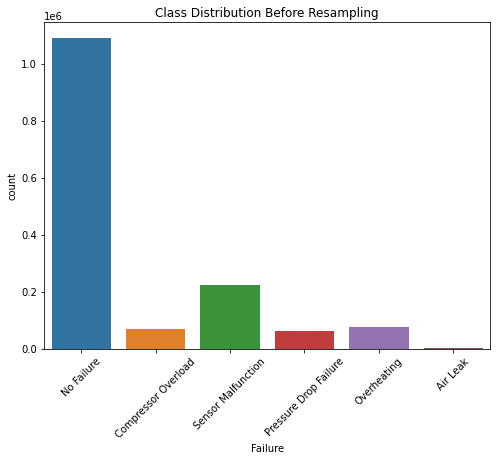

In [14]:
# Display class distribution before any preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Failure')
plt.title("Class Distribution Before Resampling")
plt.xticks(rotation=45)
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# Encode labels
label_encoder = LabelEncoder()
data['Failure_encoded'] = label_encoder.fit_transform(data['Failure'])


In [22]:
# Define features and target
X = data.drop(columns=['Failure', 'Failure_encoded','timestamp', 'Severity', 'Maintenance_Report',
                      'DV_eletric','Towers','MPG','LPS','TP2','H1','COMP','Caudal_impulses'])
y = data['Failure_encoded']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X

,TP3,DV_pressure,Reservoirs,Oil_temperature,Motor_current,Pressure_switch,Oil_level
0,9.358,-0.024,9.358,53.600,0.0400,1.0,1.0
1,9.348,-0.022,9.348,53.675,0.0400,1.0,1.0
2,9.338,-0.022,9.338,53.600,0.0425,1.0,1.0
3,9.328,-0.022,9.328,53.425,0.0400,1.0,1.0
4,9.318,-0.022,9.318,53.475,0.0400,1.0,1.0
...,...,...,...,...,...,...,...
1516943,8.918,-0.022,8.918,59.675,0.0425,1.0,1.0
1516944,8.904,-0.020,8.904,59.600,0.0450,1.0,1.0
1516945,8.890,-0.022,8.892,59.600,0.0425,1.0,1.0
1516946,8.876,-0.022,8.878,59.550,0.0450,1.0,1.0


In [24]:
# Get the class mapping
failure_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
majority_class = failure_mapping['No Failure']
minority_class = failure_mapping['Air Leak']


In [25]:
# Step 1: **Reduce 'No Failure' more aggressively (~250K)**
under_sampler = RandomUnderSampler(sampling_strategy={majority_class: 250000}, random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)


In [26]:
# Step 2: **Apply SMOTE to increase rare failure classes**
smote_strategy = {
    failure_mapping['Sensor Malfunction']: 180000,  
    failure_mapping['Overheating']: 120000,  
    failure_mapping['Compressor Overload']: 110000,
    failure_mapping['Pressure Drop Failure']: 100000,
    failure_mapping['Air Leak']: 5000  # Keeping at 5000 to prevent over-synthetic data
}

smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)


In [27]:
# Check new class distribution
resampled_df = pd.DataFrame(y_train_resampled, columns=['Failure_encoded'])
resampled_df['Failure'] = label_encoder.inverse_transform(resampled_df['Failure_encoded'])

print("Resampled class distribution:\n", resampled_df['Failure'].value_counts())


Resampled class distribution:
 No Failure               250000
Sensor Malfunction       180000
Overheating              120000
Compressor Overload      110000
Pressure Drop Failure    100000
Air Leak                   5000
Name: Failure, dtype: int64


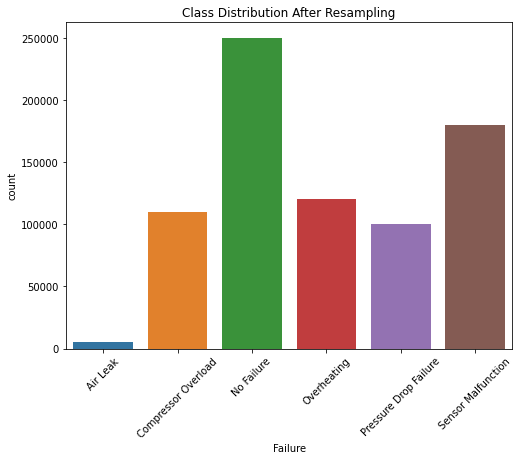

In [28]:
# Plot the new distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_df, x='Failure')
plt.title("Class Distribution After Resampling")
plt.xticks(rotation=45)
plt.show()

In [29]:
data["Failure"].value_counts()

No Failure               1090308
Sensor Malfunction        223595
Overheating                74183
Compressor Overload        68758
Pressure Drop Failure      59876
Air Leak                     228
Name: Failure, dtype: int64

In [ ]:
# Save the dataset to a CSV file
#data.to_csv('metro_processed_data.csv', index=False)

#print("Dataset saved successfully as 'processed_data.csv'")

### Model Building

### Machine Learning models

##### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [31]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=500, random_state=42)

In [33]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC curve

In [34]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print("✅ Logistic Regression Results:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

✅ Logistic Regression Results:
Accuracy: 0.8724
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.27      0.04        52
           1       0.66      0.95      0.78     13686
           2       0.99      0.87      0.93    218406
           3       0.82      0.84      0.83     14838
           4       0.76      0.87      0.81     11891
           5       0.62      0.86      0.72     44517

    accuracy                           0.87    303390
   macro avg       0.65      0.78      0.69    303390
weighted avg       0.90      0.87      0.88    303390



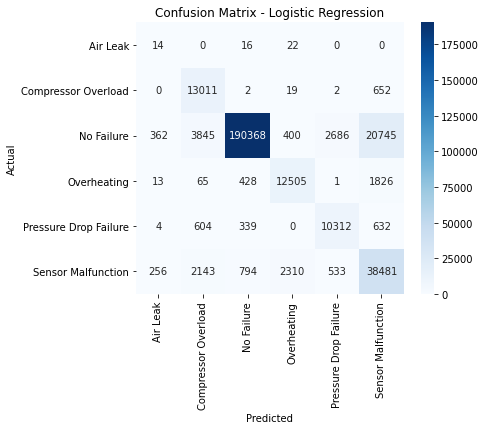

In [35]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

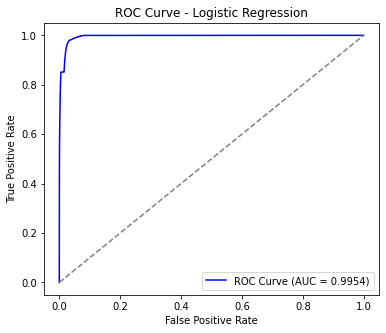

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Adjust pos_label if needed
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

##### Random Forest

In [37]:
# Import library
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [39]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

In [40]:
# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("✅ Random Forest Results:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


✅ Random Forest Results:
Accuracy: 0.9613
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.98      0.11        52
           1       0.94      0.96      0.95     13686
           2       0.99      0.97      0.98    218406
           3       0.94      0.94      0.94     14838
           4       0.97      0.98      0.98     11891
           5       0.85      0.91      0.88     44517

    accuracy                           0.96    303390
   macro avg       0.79      0.96      0.81    303390
weighted avg       0.97      0.96      0.96    303390



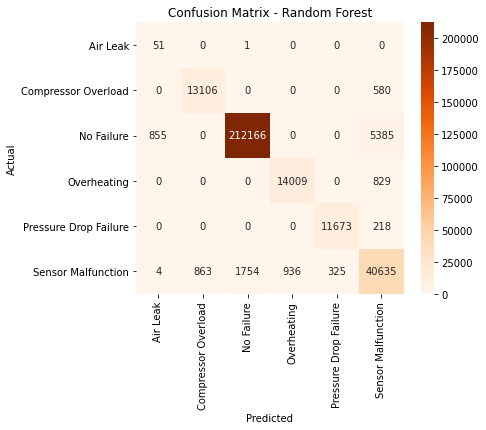

In [41]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


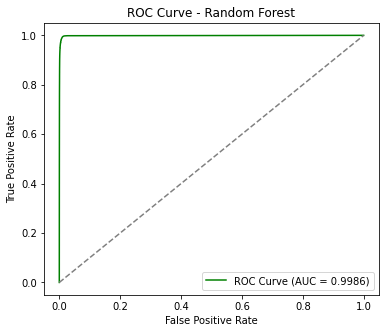

In [42]:
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

#### XGBoost

In [43]:
# Import XGBoost
from xgboost import XGBClassifier

In [44]:
# Train XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

In [46]:
# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("✅ XGBoost Results:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

✅ XGBoost Results:
Accuracy: 0.9621
Classification Report:
               precision    recall  f1-score   support

           0       0.06      1.00      0.11        52
           1       0.93      0.96      0.95     13686
           2       0.99      0.97      0.98    218406
           3       0.93      0.95      0.94     14838
           4       0.97      0.98      0.98     11891
           5       0.86      0.91      0.89     44517

    accuracy                           0.96    303390
   macro avg       0.79      0.96      0.81    303390
weighted avg       0.97      0.96      0.96    303390



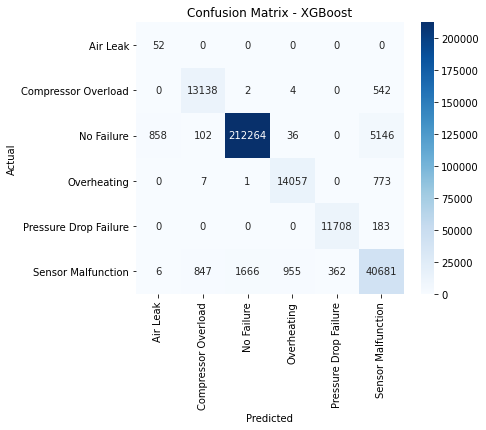

In [47]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

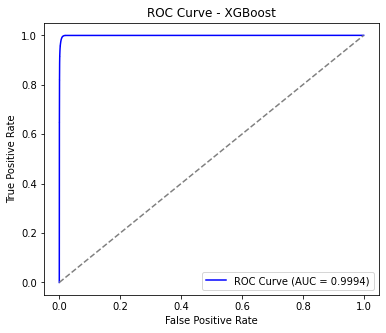

In [48]:
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb, pos_label=1)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'ROC Curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

#### Support Vector Machine

In [49]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import make_pipeline
import numpy as np

In [50]:
# Initialize SGDClassifier with hinge loss (equivalent to SVM)
sgd_svm = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', class_weight='balanced', random_state=42, max_iter=1000, tol=1e-3))

In [51]:
# Train the model (much faster)
sgd_svm.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', random_state=42))])

In [52]:
# Predict on test set
y_pred = sgd_svm.predict(X_test)

In [53]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ SGD-SVM Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


✅ SGD-SVM Accuracy: 0.8030
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.90      0.02        52
           1       0.57      0.97      0.72     13686
           2       0.95      0.82      0.88    218406
           3       0.89      0.84      0.86     14838
           4       0.15      0.06      0.09     11891
           5       0.56      0.88      0.68     44517

    accuracy                           0.80    303390
   macro avg       0.52      0.74      0.54    303390
weighted avg       0.84      0.80      0.81    303390



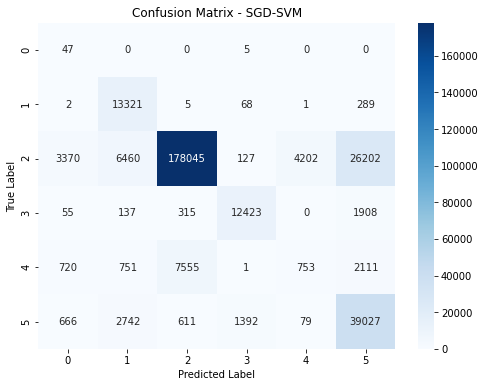

In [54]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SGD-SVM')
plt.show()

In [55]:
# Compute ROC Curve and AUC for each class
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Since SGDClassifier does not have predict_proba, we use decision_function instead
y_scores = sgd_svm.decision_function(X_test)

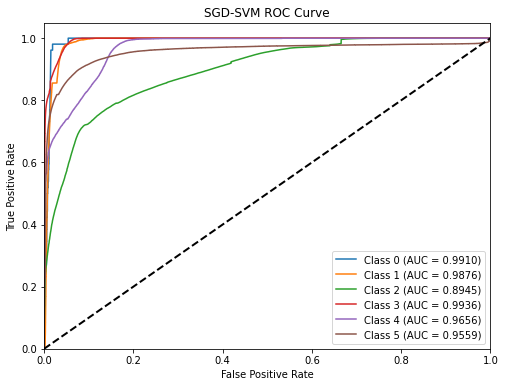

In [56]:
plt.figure(figsize=(8, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGD-SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Deep Learning Models

#### ANN

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Convert target to categorical format
num_classes = len(label_encoder.classes_)
y_train_categorical = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

In [59]:
# Build ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [60]:
# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
# Train the model
history = ann_model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2, verbose=1, steps_per_epoch=5 )

Epoch 1/10
5/5 [==============================] - 3s 726ms/step - loss: 0.4041 - accuracy: 0.8719 - val_loss: 0.7665 - val_accuracy: 0.6143
Epoch 2/10
5/5 [==============================] - 3s 745ms/step - loss: 0.3807 - accuracy: 0.8469 - val_loss: 0.7473 - val_accuracy: 0.6169
Epoch 3/10
5/5 [==============================] - 3s 733ms/step - loss: 0.3796 - accuracy: 0.8438 - val_loss: 0.7430 - val_accuracy: 0.6168
Epoch 4/10
5/5 [==============================] - 3s 742ms/step - loss: 0.4122 - accuracy: 0.8625 - val_loss: 0.7307 - val_accuracy: 0.6152
Epoch 5/10
5/5 [==============================] - 3s 782ms/step - loss: 0.3534 - accuracy: 0.8656 - val_loss: 0.7303 - val_accuracy: 0.6139
Epoch 6/10
5/5 [==============================] - 3s 774ms/step - loss: 0.3897 - accuracy: 0.8469 - val_loss: 0.7287 - val_accuracy: 0.6147
Epoch 7/10
5/5 [==============================] - 3s 742ms/step - loss: 0.3606 - accuracy: 0.8875 - val_loss: 0.7460 - val_accuracy: 0.6116
Epoch 8/10
5/5 [====

In [63]:
# Evaluate the model
eval_results = ann_model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"ANN Evaluation Results: {eval_results}")

# Predictions and evaluation metrics
y_pred = ann_model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

ANN Evaluation Results: [0.2993800938129425, 0.9129239320755005]
9481/9481 [==============================] - 11s 1ms/step


In [64]:
classification_rep = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_rep)

Classification Report:
                        precision    recall  f1-score   support

             Air Leak       0.08      0.81      0.15        52
  Compressor Overload       0.78      0.96      0.86     13686
           No Failure       0.95      0.96      0.95    218406
          Overheating       0.94      0.83      0.88     14838
Pressure Drop Failure       0.50      0.08      0.13     11891
   Sensor Malfunction       0.83      0.90      0.86     44517

             accuracy                           0.91    303390
            macro avg       0.68      0.76      0.64    303390
         weighted avg       0.90      0.91      0.90    303390



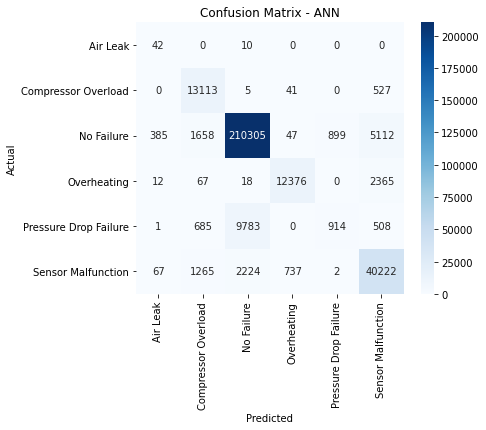

In [65]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ANN")
plt.show()


ANN - Accuracy - 91%

#### CNN

In [66]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN (if required)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Evaluate and visualize results (similar to ANN)


In [67]:
# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


In [68]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# Train the model
cnn_history = cnn_model.fit(X_train_reshaped, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2, steps_per_epoch=5)

Epoch 1/10
5/5 [==============================] - 3s 696ms/step - loss: 1.5861 - accuracy: 0.4719 - val_loss: 1.6483 - val_accuracy: 0.3101
Epoch 2/10
5/5 [==============================] - 3s 789ms/step - loss: 1.4405 - accuracy: 0.6031 - val_loss: 1.6271 - val_accuracy: 0.2946
Epoch 3/10
5/5 [==============================] - 3s 766ms/step - loss: 1.3109 - accuracy: 0.6250 - val_loss: 1.6318 - val_accuracy: 0.2443
Epoch 4/10
5/5 [==============================] - 3s 751ms/step - loss: 1.1805 - accuracy: 0.6906 - val_loss: 1.6609 - val_accuracy: 0.2349
Epoch 5/10
5/5 [==============================] - 3s 783ms/step - loss: 1.1324 - accuracy: 0.6281 - val_loss: 1.6756 - val_accuracy: 0.2468
Epoch 6/10
5/5 [==============================] - 3s 715ms/step - loss: 1.0365 - accuracy: 0.6625 - val_loss: 1.6772 - val_accuracy: 0.2775
Epoch 7/10
5/5 [==============================] - 3s 748ms/step - loss: 1.0038 - accuracy: 0.6594 - val_loss: 1.6476 - val_accuracy: 0.3471
Epoch 8/10
5/5 [====

In [71]:
# Evaluate the CNN model
cnn_eval_results = cnn_model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"CNN Evaluation Results: {cnn_eval_results}")

CNN Evaluation Results: [0.6863294243812561, 0.7499159574508667]


In [72]:
# Predictions and evaluation metrics
cnn_y_pred = cnn_model.predict(X_test_reshaped)
cnn_y_pred_classes = cnn_y_pred.argmax(axis=1)

# Classification Report
cnn_classification_rep = classification_report(y_test, cnn_y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report - CNN:\n", cnn_classification_rep)

9481/9481 [==============================] - 12s 1ms/step


C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - CNN:
                        precision    recall  f1-score   support

             Air Leak       0.00      0.00      0.00        52
  Compressor Overload       0.57      0.72      0.63     13686
           No Failure       0.94      0.76      0.84    218406
          Overheating       0.88      0.61      0.72     14838
Pressure Drop Failure       0.00      0.00      0.00     11891
   Sensor Malfunction       0.43      0.96      0.59     44517

             accuracy                           0.75    303390
            macro avg       0.47      0.51      0.46    303390
         weighted avg       0.81      0.75      0.76    303390



C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


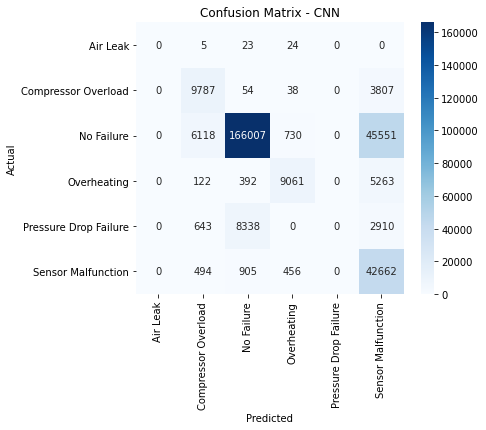

In [73]:
# Confusion Matrix Visualization
cnn_conf_matrix = confusion_matrix(y_test, cnn_y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cnn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()


CNN - Accuracy : 75%

#### Hybrid - ANN and CNN

In [74]:
# Reshape data for CNN input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [75]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Dropout, concatenate

# Input layer
input_layer = Input(shape=(X_train_reshaped.shape[1], 1))

# CNN branch
cnn_layer = Conv1D(filters=32, kernel_size=3, activation='relu')(input_layer)
cnn_layer = Dropout(0.3)(cnn_layer)
cnn_layer = Flatten()(cnn_layer)

# ANN branch (optional additional dense layers if needed)
ann_layer = Dense(64, activation='relu')(cnn_layer)
ann_layer = Dropout(0.3)(ann_layer)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(ann_layer)

# Combine into a model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
hybrid_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             128       
                                                                 
 dropout_4 (Dropout)         (None, 5, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                10304     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 6)                 390   

In [77]:
# Train the hybrid model
hybrid_history = hybrid_model.fit(
    X_train_reshaped, 
    y_train_categorical, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.2,
    verbose=1,
    steps_per_epoch = 5
)

Epoch 1/10
5/5 [==============================] - 3s 726ms/step - loss: 0.4351 - accuracy: 0.8375 - val_loss: 0.7832 - val_accuracy: 0.5894
Epoch 2/10
5/5 [==============================] - 3s 739ms/step - loss: 0.4746 - accuracy: 0.8250 - val_loss: 0.7817 - val_accuracy: 0.5887
Epoch 3/10
5/5 [==============================] - 3s 766ms/step - loss: 0.4823 - accuracy: 0.8250 - val_loss: 0.7828 - val_accuracy: 0.5890
Epoch 4/10
5/5 [==============================] - 3s 744ms/step - loss: 0.4293 - accuracy: 0.8531 - val_loss: 0.7940 - val_accuracy: 0.5865
Epoch 5/10
5/5 [==============================] - 3s 725ms/step - loss: 0.4651 - accuracy: 0.8188 - val_loss: 0.7896 - val_accuracy: 0.5873
Epoch 6/10
5/5 [==============================] - 3s 741ms/step - loss: 0.3800 - accuracy: 0.8781 - val_loss: 0.7857 - val_accuracy: 0.5881
Epoch 7/10
5/5 [==============================] - 3s 711ms/step - loss: 0.4225 - accuracy: 0.8406 - val_loss: 0.7912 - val_accuracy: 0.5876
Epoch 8/10
5/5 [====

In [78]:
# Evaluate the Hybrid Model
hybrid_eval_results = hybrid_model.evaluate(X_test_reshaped, y_test_categorical, verbose=0)
print(f"Hybrid Model Evaluation Results: {hybrid_eval_results}")

Hybrid Model Evaluation Results: [0.33486297726631165, 0.8929694294929504]


In [79]:
# Predictions and evaluation metrics
hybrid_y_pred = hybrid_model.predict(X_test_reshaped)
hybrid_y_pred_classes = hybrid_y_pred.argmax(axis=1)

# Classification Report
hybrid_classification_rep = classification_report(y_test, hybrid_y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report - Hybrid Model:\n", hybrid_classification_rep)

9481/9481 [==============================] - 12s 1ms/step
Classification Report - Hybrid Model:
                        precision    recall  f1-score   support

             Air Leak       0.04      0.67      0.08        52
  Compressor Overload       0.66      0.95      0.78     13686
           No Failure       0.95      0.94      0.94    218406
          Overheating       0.93      0.82      0.87     14838
Pressure Drop Failure       0.50      0.02      0.03     11891
   Sensor Malfunction       0.77      0.92      0.84     44517

             accuracy                           0.89    303390
            macro avg       0.64      0.72      0.59    303390
         weighted avg       0.89      0.89      0.88    303390



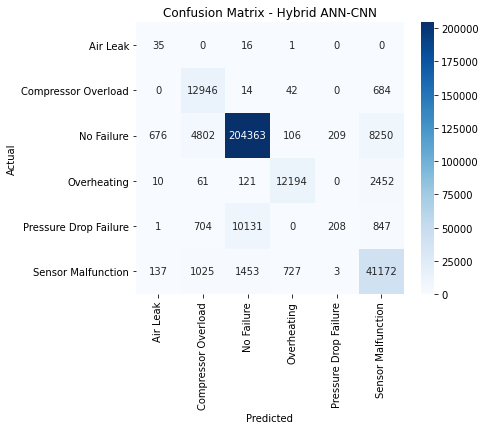

In [80]:
# Confusion Matrix Visualization
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(hybrid_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Hybrid ANN-CNN")
plt.show()

ANN and CNN - 89%

#### DNN

In [81]:
# Build DNN model
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


In [82]:
# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dnn_model.fit(X_train_scaled, y_train_categorical, epochs=10, batch_size=64, validation_split=0.2, verbose=1, steps_per_epoch=5)

Epoch 1/10
5/5 [==============================] - 4s 861ms/step - loss: 1.7390 - accuracy: 0.2688 - val_loss: 1.7013 - val_accuracy: 0.2535
Epoch 2/10
5/5 [==============================] - 3s 850ms/step - loss: 1.5107 - accuracy: 0.6000 - val_loss: 1.6711 - val_accuracy: 0.2485
Epoch 3/10
5/5 [==============================] - 3s 864ms/step - loss: 1.3429 - accuracy: 0.6250 - val_loss: 1.7127 - val_accuracy: 0.2602
Epoch 4/10
5/5 [==============================] - 3s 825ms/step - loss: 1.2207 - accuracy: 0.6219 - val_loss: 1.7885 - val_accuracy: 0.2666
Epoch 5/10
5/5 [==============================] - 3s 867ms/step - loss: 1.1033 - accuracy: 0.6313 - val_loss: 1.8643 - val_accuracy: 0.3500
Epoch 6/10
5/5 [==============================] - 3s 846ms/step - loss: 1.0152 - accuracy: 0.6719 - val_loss: 1.8180 - val_accuracy: 0.4182
Epoch 7/10
5/5 [==============================] - 3s 832ms/step - loss: 1.0209 - accuracy: 0.6781 - val_loss: 1.6496 - val_accuracy: 0.4753
Epoch 8/10
5/5 [====

In [83]:
# Evaluate the model
eval_results = dnn_model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"DNN Evaluation Results: {eval_results}")

DNN Evaluation Results: [0.6256405115127563, 0.7788094282150269]


In [84]:
# Predictions and evaluation metrics
y_pred = dnn_model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

classification_rep = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_rep)

9481/9481 [==============================] - 13s 1ms/step


C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                        precision    recall  f1-score   support

             Air Leak       0.00      0.00      0.00        52
  Compressor Overload       0.56      0.91      0.69     13686
           No Failure       0.95      0.78      0.86    218406
          Overheating       0.85      0.79      0.82     14838
Pressure Drop Failure       0.00      0.00      0.00     11891
   Sensor Malfunction       0.47      0.94      0.63     44517

             accuracy                           0.78    303390
            macro avg       0.47      0.57      0.50    303390
         weighted avg       0.82      0.78      0.78    303390



C:\Users\A.GOWTHAMI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


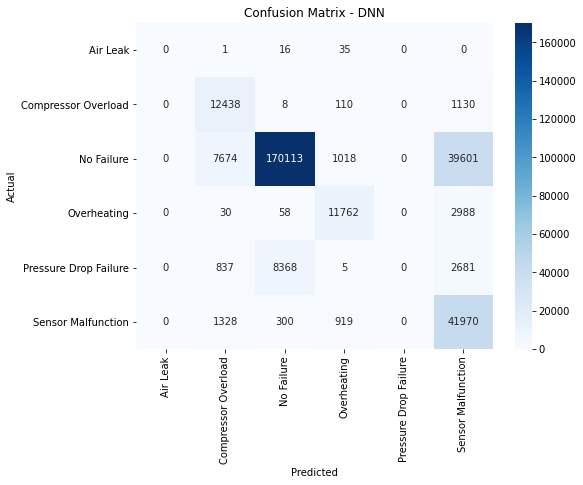

In [85]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DNN")
plt.show()

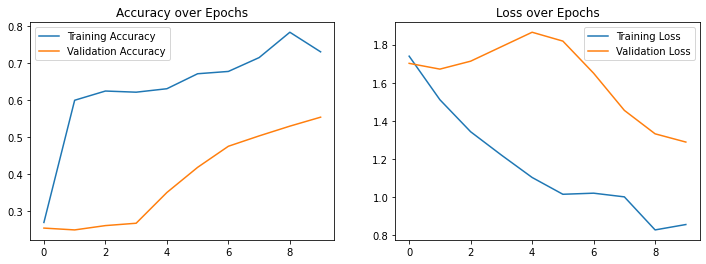

In [86]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

DNN - Accuracy - 78%